# Init

In [11]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import glob
from scipy.spatial.distance import euclidean, pdist, squareform
import sys
sys.path.append(os.environ['CAPSTONE_PYTHON_SOURCE'])
#setting path to the env variable
folder = os.environ['CAPSTONE_DATA']
folder

'C:\\max\\Google Drive Max\\Max Shared\\Master Data Science\\2020-05 Capstone A\\msds_capstone\\data\\'

# Create Similarity Dataframe

In [3]:
from similarity.similarity import calcSimilarity, getMatrix
from ETL.ETL import loadDataset

In [4]:
import spacy 
import spacy.cli
### SPACY INITIAL SETUP ###
#run in terminal:  python -m spacy download en_core_web_lg
spacy.cli.download("en_core_web_lg")

### load NLP ###
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## Loading and filtering

In [5]:
#dataRaw= pd.read_pickle(os.path.join(folder,'tidy_data/Transactions_v2/Transactions.pkl'))
dataRaw= loadDataset(version=3)
data=dataRaw[dataRaw['Category (CatMan)'].isin(['SUP PREM WHISKEY','ECONOMY VODKA'])]
print(data.shape)
plt.style.use('default')
data.head(1)

(53552, 45)


,Month,Chain Master ID,Chain Master,Customer ID,Customer,Beverage Type,Vendor,Vendor ID,Brand,Label,...,Qty Per Case,Alcohol Proof,STD. Cases,Dollar Sales,9L Cases,Dollar Sales per Case,Dollar Sales per 9L Case,Size Liters,Bottles,Transactions
0,2015-11-01,2577,JUANITOS,300001611,JUANITOS LIQUOR STORE INC,SPIRITS,SAZERAC/GEMINI SPIRITS & WINE,854,TAAKA,TAAKA VODKA 80,...,12,80.0,350.0,20412.0,465.5,58.32,43.849624,0.1,4200.0,1


In [6]:
datat= data[(data['Category (CatMan)'] == 'SUP PREM WHISKEY') & (data['Chain Master']=='SPECS')] 
datat.shape


(6147, 45)

## Similarity Matrix

Based on how many times two products have been bought together in the same month

### Testing text similarity

In [7]:
import textdistance #https://pypi.org/project/textdistance/
from similarity.similarity import spacy_similarity
t1='MCCORMICK APPLE VODKA 60  1L'
t2= 'TAAKA APL VODKA  1L'
print('Levenshtein: ',textdistance.levenshtein.normalized_similarity(t1,t2))
print('Cosine:      ',textdistance.cosine.normalized_similarity(t1,t2))
print('Jaccard:     ',textdistance.jaccard.normalized_similarity(t1,t2))
print('NLP Spacy:   ',spacy_similarity(t1,t2,nlp))


Levenshtein:  0.5
Cosine:       0.65033247714309
Jaccard:      0.46875
NLP Spacy:    0.7222400280225594


**Testing Matrix**

In [9]:
t=data[(data['Chain Master']=='WESTERN BEV LIQ TX') & (data['Category (CatMan)']=='ECONOMY VODKA')]
##getting just the matrix##
m=getMatrix(t,periodCol='Month')
m.head(5)

Product2,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHERRY VODKA 60 1L,MCCORMICK CHOCOLATE VODKA 1L,MCCORMICK CHOCOLATE VODKA 60 1L,MCCORMICK CITRUS VODKA 60 1L,MCCORMICK GRAPE VODKA 60 1L,MCCORMICK PEACH VODKA 60 1L,MCCORMICK RASPBERRY VODKA 60 1L,MCCORMICK WATERMELON VODKA 60 1L,MCCORMICK WHIPPED CREAM VODKA 60 1L,...,TAAKA RED BERRY VODKA 1L,TAAKA RED BERRY VODKA 375M,TAAKA VODKA 80 1L,TAAKA VODKA 80 BLUE PET 375M,TAAKA VODKA 80 PET 1.75L,TAAKA VODKA 80 PET 750M,TAAKA WHIPPED CRM VODKA GLS 1L,TAAKA WHIPPED CRM VODKA PET 1.75L,TEXAS SPIRIT VODKA 80 1.75L,TEXAS SPIRIT VODKA 80 SAZ NL 1.75L
Product,,,,,,,,,,,,,,,,,,,,,
MCCORMICK APPLE VODKA 60 1L,51,51,1,9,51,44,50,21,51,48,...,0,8,51,30,51,17,0,39,26,26
MCCORMICK CHERRY VODKA 60 1L,51,51,1,9,51,44,50,21,51,48,...,0,8,51,30,51,17,0,39,26,26
MCCORMICK CHOCOLATE VODKA 1L,1,1,1,1,1,1,1,0,1,1,...,0,0,1,0,1,0,0,1,1,0
MCCORMICK CHOCOLATE VODKA 60 1L,9,9,1,9,9,9,9,5,9,9,...,0,0,9,0,9,2,0,9,8,0
MCCORMICK CITRUS VODKA 60 1L,51,51,1,9,51,44,50,21,51,48,...,0,8,51,30,51,17,0,39,26,26


**Testing a Product**

In [14]:
t=data[(data['Chain Master']=='WESTERN BEV LIQ TX') & (data['Category (CatMan)']=='ECONOMY VODKA')]
df = calcSimilarity(t,doNLP=True,nlp=nlp,periodCol='Month')
df[df['Product']=='MCCORMICK APPLE VODKA 60  1L'] #MCCORMICK APPLE VODKA 60  1L']


,Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP
0,MCCORMICK APPLE VODKA 60 1L,MCCORMICK APPLE VODKA 60 1L,1.000000,51,1.000000,1.000000,1.000000,1.000000
1,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHERRY VODKA 60 1L,1.000000,51,1.000000,0.842235,0.793103,0.940141
2,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CITRUS VODKA 60 1L,1.000000,51,1.000000,0.807142,0.793103,0.923805
3,MCCORMICK APPLE VODKA 60 1L,MCCORMICK WATERMELON VODKA 60 1L,1.000000,51,1.000000,0.855337,0.757576,0.933619
4,MCCORMICK APPLE VODKA 60 1L,TAAKA VODKA 80 1L,0.008300,51,1.000000,0.623610,0.500000,0.831466
5,MCCORMICK APPLE VODKA 60 1L,TAAKA VODKA 80 PET 1.75L,0.008300,51,1.000000,0.617213,0.285714,0.633556
6,MCCORMICK APPLE VODKA 60 1L,MCCORMICK PEACH VODKA 60 1L,0.210897,50,0.980392,0.928571,0.821429,0.942061
7,MCCORMICK APPLE VODKA 60 1L,TAAKA FRUIT PUNCH VODKA PET 1.75L,0.131006,50,0.980392,0.657952,0.363636,0.631844
8,MCCORMICK APPLE VODKA 60 1L,MCCORMICK WHIPPED CREAM VODKA 60 1L,0.091747,48,0.941176,0.862483,0.685714,0.867760
9,MCCORMICK APPLE VODKA 60 1L,MCCORMICK GRAPE VODKA 60 1L,0.040719,44,0.862745,0.928571,0.857143,0.928584


## Running for entire DataFrame
by Chain and Category


In [24]:
dfSimilarity = (data.groupby(['Chain Master','Category (CatMan)'])
                .apply(calcSimilarity,doNLP=True,nlp=nlp,periodCol='Month')
                .reset_index())
dfSimilarity['Events_NLP'] = dfSimilarity['EventsNorm'] *  dfSimilarity['TextNLP']
dfSimilarity=dfSimilarity.drop('level_2',axis=1)
    

In [10]:
#testing
dfSimilarity[(dfSimilarity['Chain Master']=='WESTERN BEV LIQ TX') & (dfSimilarity['Product']=='MCCORMICK APPLE VODKA 60  1L')].sort_values(by='Events_NLP',ascending=False).head(10)

#to do
#save the outpu to a file then use a function to read the topn based on a maetrics
#fun(prodname, topn, similarityField=TxtNLP*EventNorm, ascending = False) returns top n products based on a similarity
#create heat map for matrix

,Chain Master,Category (CatMan),Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP,Events_NLP
119520,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK APPLE VODKA 60 1L,1.000000,51,1.000000,1.000000,1.000000,1.000000,1.000000
119521,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHERRY VODKA 60 1L,1.000000,51,1.000000,0.842235,0.793103,0.940141,0.940141
119523,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK WATERMELON VODKA 60 1L,1.000000,51,1.000000,0.855337,0.757576,0.933619,0.933619
119522,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CITRUS VODKA 60 1L,1.000000,51,1.000000,0.807142,0.793103,0.923805,0.923805
119526,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK PEACH VODKA 60 1L,0.210897,50,0.980392,0.928571,0.821429,0.942061,0.923589
119524,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,TAAKA VODKA 80 1L,0.008300,51,1.000000,0.623610,0.500000,0.831466,0.831466
119528,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK WHIPPED CREAM VODKA 60 1L,0.091747,48,0.941176,0.862483,0.685714,0.867760,0.816715
119529,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK GRAPE VODKA 60 1L,0.040719,44,0.862745,0.928571,0.857143,0.928584,0.801131
119525,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,TAAKA VODKA 80 PET 1.75L,0.008300,51,1.000000,0.617213,0.285714,0.633556,0.633556
119527,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,TAAKA FRUIT PUNCH VODKA PET 1.75L,0.131006,50,0.980392,0.657952,0.363636,0.631844,0.619455


## Saving to file

In [11]:
dfSimilarity.to_pickle(os.path.join(folder,'tidy_data/Transactions_v3/Similarity.pkl'))
dfSimilarity.to_csv(os.path.join(folder,'tidy_data/Transactions_v3/Similarity.csv'))

# Read Similarity Dataframe

In [2]:
import sys, os
sys.path.append(os.environ['CAPSTONE_PYTHON_SOURCE'])
from similarity.similarity import loadSimilarity

dfSimilarity = loadSimilarity(version=3)


# Top N similar Products

In [3]:
from similarity.similarity import topSimilar
topSimilar(dfSimilarity,ChainMaster='WESTERN BEV LIQ TX',Product='MCCORMICK APPLE VODKA 60  1L',topn=10)

,Chain Master,Category (CatMan),Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP,Events_NLP
119520,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK APPLE VODKA 60 1L,1.000000,51,1.000000,1.000000,1.000000,1.000000,1.000000
119526,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK PEACH VODKA 60 1L,0.210897,50,0.980392,0.928571,0.821429,0.942061,0.923589
119535,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK RASPBERRY VODKA 60 1L,0.009803,21,0.411765,0.868599,0.812500,0.940740,0.387364
119521,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHERRY VODKA 60 1L,1.000000,51,1.000000,0.842235,0.793103,0.940141,0.940141
119523,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK WATERMELON VODKA 60 1L,1.000000,51,1.000000,0.855337,0.757576,0.933619,0.933619
119529,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK GRAPE VODKA 60 1L,0.040719,44,0.862745,0.928571,0.857143,0.928584,0.801131
119537,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHOCOLATE VODKA 60 1L,0.006892,9,0.176471,0.868599,0.781250,0.924831,0.163205
119522,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CITRUS VODKA 60 1L,1.000000,51,1.000000,0.807142,0.793103,0.923805,0.923805
119540,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHOCOLATE VODKA 1L,0.005788,1,0.019608,0.807142,0.655172,0.878035,0.017216
119528,WESTERN BEV LIQ TX,ECONOMY VODKA,MCCORMICK APPLE VODKA 60 1L,MCCORMICK WHIPPED CREAM VODKA 60 1L,0.091747,48,0.941176,0.862483,0.685714,0.867760,0.816715


In [5]:
topSimilar(dfSimilarity,ChainMaster='WESTERN BEV LIQ TX',Product='MCCORMICK APPLE VODKA 60  1L',topn=10,pivot=True)

Product2,MCCORMICK APPLE VODKA 60 1L,MCCORMICK CHERRY VODKA 60 1L,MCCORMICK CHOCOLATE VODKA 1L,MCCORMICK CHOCOLATE VODKA 60 1L,MCCORMICK CITRUS VODKA 60 1L,MCCORMICK GRAPE VODKA 60 1L,MCCORMICK PEACH VODKA 60 1L,MCCORMICK RASPBERRY VODKA 60 1L,MCCORMICK WATERMELON VODKA 60 1L,MCCORMICK WHIPPED CREAM VODKA 60 1L
Product,,,,,,,,,,
MCCORMICK APPLE VODKA 60 1L,1,0.940141,0.878035,0.924831,0.923805,0.928584,0.942061,0.94074,0.933619,0.86776


# Heatmap

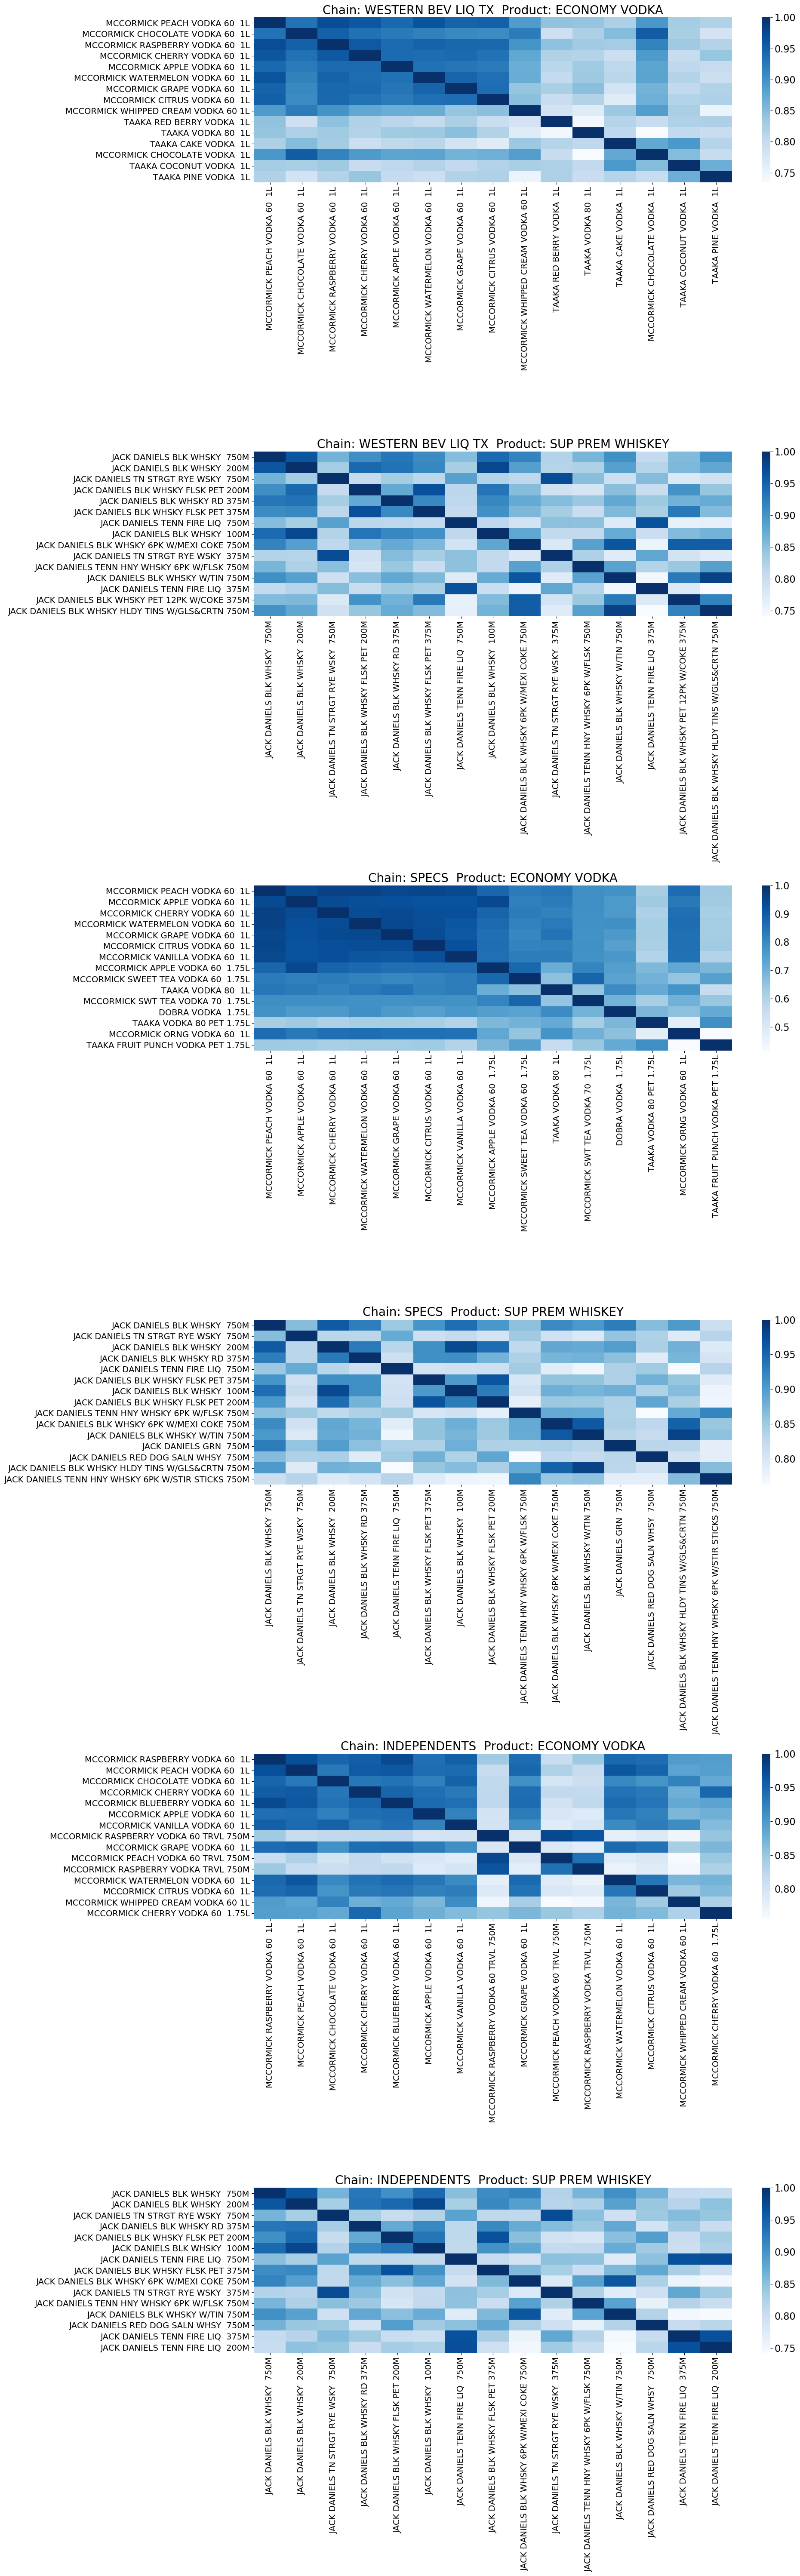

In [33]:
from similarity.similarity import getHeatmap
from similarity.similarity import loadSimilarity
dfSimilarity = loadSimilarity(version=3)
custs= ['WESTERN BEV LIQ TX','SPECS','INDEPENDENTS']# dfSimilarity['Chain Master'].unique()
maxc =len(custs)
maxp = dfSimilarity['Category (CatMan)'].nunique()
plt.figure(figsize=(20,10*maxc*maxp))
import seaborn as sns
for ic,c in enumerate(custs):
    prods = dfSimilarity[dfSimilarity['Chain Master']==c]['Category (CatMan)'].unique()
    for ip,p in enumerate(prods):
        plt.subplot(maxc*maxp,1,(ic)*maxp+(ip)+1)
        ax=getHeatmap(dfSimilarity,ChainMaster = c,prodCat = p,size=15,norm=True)
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=16)
        plt.title('Chain: ' + c +'  Product: ' + p,size=20)
        plt.tick_params(axis='y',labelsize=14)
        plt.tick_params(axis='x',labelsize=14)
        plt.xlabel('')
        plt.ylabel('')
plt.tight_layout()
